In [7]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('MA_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3167700644927664
               A              B         C        D
0   5.759161e-26   4.936801e+36  45.32733  0.31478
1   1.404707e-33  4.984639e+123  44.51848  0.07224
2   7.385841e-37   1.149998e+99  44.32612  0.01430
3   7.385841e-37   1.149998e+99  44.69770  0.00526
4   2.265837e-24   7.124603e+86  44.30242  0.01505
..           ...            ...       ...      ...
65  1.724288e-29   6.596538e+18  44.54921  0.06313
66  8.711623e-21   1.539458e+65  44.65970  0.01427
67  1.373961e-53  6.769055e+147  44.79900  0.00287
68  3.704462e-20   1.616379e+32  44.18964  0.16066
69  4.605640e-50   2.134114e+75  44.25669  0.01856

[67 rows x 4 columns]


In [3]:
data.describe()

,A,B,C,D
count,6.700000e+01,6.700000e+01,67.000000,67.000000
mean,1.100131e-11,1.688979e+149,44.574503,0.053932
std,5.172267e-11,1.375269e+150,0.316770,0.058286
min,3.087104e-59,5.472271e+04,44.084260,0.001460
25%,6.016877e-35,4.223706e+59,44.324415,0.014285
50%,2.306058e-29,6.848611e+82,44.541830,0.031930
75%,2.287812e-20,7.950733e+102,44.762375,0.069565
max,2.913859e-10,1.125783e+151,45.679790,0.314780


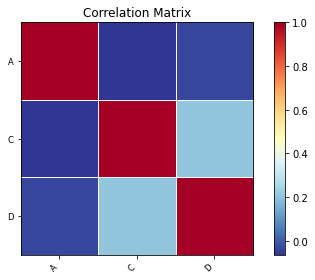

In [4]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -1.042310188728629e-11
intercepción b0 is 4.756059038722384e-10


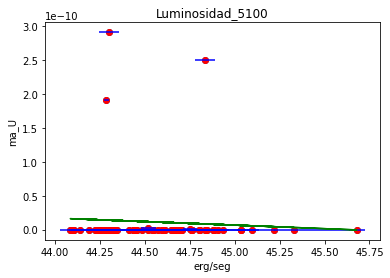

In [5]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_U')
plt.savefig("Luminosidad_5100_ma_U.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

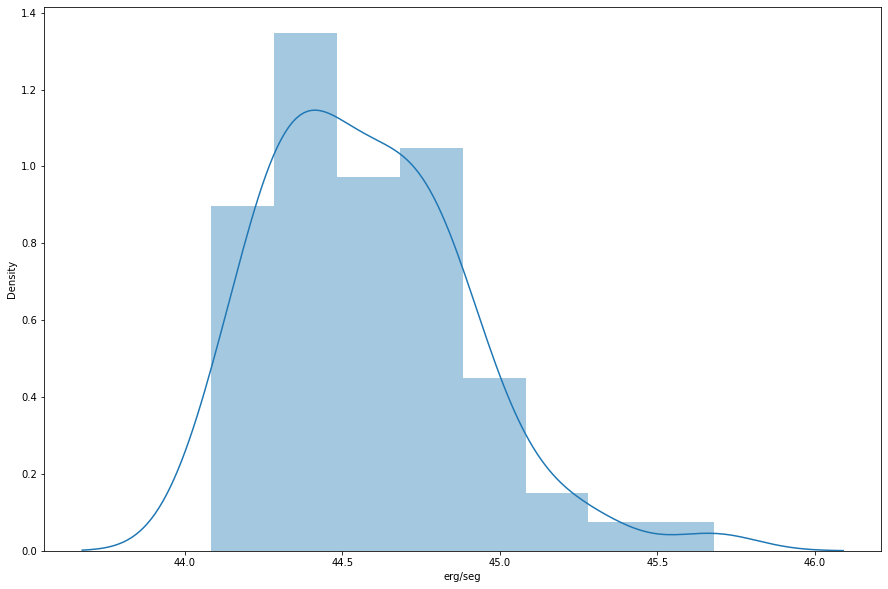

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [38]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.13232161]
 [1.        ]]
Intercepción: [-5.81082218  0.        ]
Errorcuadratico medio : 0.14173816113134063
Raiz del error cuadratico medio:  0.37648128921812385
 Coeficiente de determinacion R2 :  0.5030342144629198


In [10]:
data=pd.read_csv('MA_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.3180446978880407
               A         B        C
0   2.258040e-32  45.32733  0.31478
1   1.946127e-35  44.51848  0.07224
2   6.832871e-19  44.32612  0.01430
3   5.096099e-18  44.69770  0.00526
4   2.913186e-61  44.30242  0.01505
..           ...       ...      ...
74  1.195085e-21  44.78145  0.09942
75  4.059139e-37  44.77507  0.07369
76  9.200405e-24  44.36424  0.00708
77  3.073257e-41  44.17580  0.04911
78  9.714517e-49  44.40151  0.00523

[78 rows x 3 columns]


In [11]:
data.describe()

,A,B,C
count,7.800000e+01,78.000000,78.000000
mean,2.932790e-01,44.592258,0.053390
std,2.039295e+00,0.318045,0.057278
min,2.122387e-82,44.084260,0.001460
25%,1.023269e-37,44.331250,0.014015
50%,2.340090e-28,44.565380,0.033590
75%,3.371341e-22,44.795455,0.070902
max,1.715112e+01,45.679790,0.314780


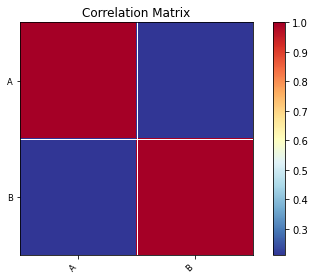

In [16]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  1.3529824182828363
intercepción b0 is -60.03926219425225


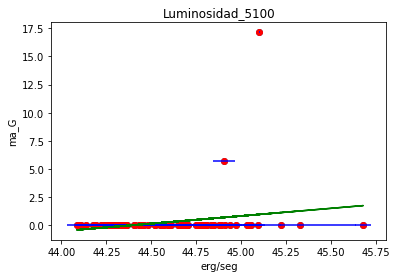

In [13]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_G')
plt.savefig("Luminosidad_5100_ma_G.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

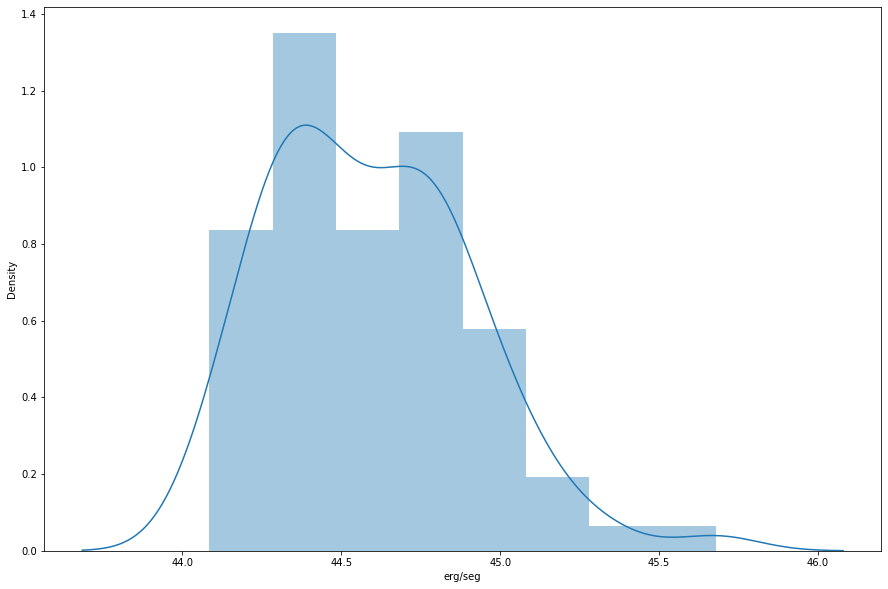

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [18]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.35298242]
 [1.        ]]
Intercepción: [-6.00392622e+01  7.10542736e-15]
Errorcuadratico medio : 1.9613070318459904
Raiz del error cuadratico medio:  1.400466719292533
 Coeficiente de determinacion R2 :  0.5222623318743052


In [19]:
data=pd.read_csv('MA_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.31535848075411527
               A         B        C
0   1.321420e-47  45.32733  0.31478
1   3.119869e-75  44.51848  0.07224
2   1.569205e-16  44.32612  0.01430
3   1.873784e-23  44.69770  0.00526
4   3.556592e-20  44.30242  0.01505
..           ...       ...      ...
79  1.208600e-46  44.20654  0.02390
80  5.288202e-24  44.59746  0.00671
81  9.504214e-45  44.17015  0.06091
82  1.666591e-33  44.31297  0.01773
83  5.765731e-14  44.52867  0.01500

[83 rows x 3 columns]


In [20]:
data.describe()

,A,B,C
count,8.300000e+01,83.000000,83.000000
mean,8.113111e-04,44.580036,0.053406
std,7.244331e-03,0.315358,0.057101
min,3.119869e-75,44.084260,0.001460
25%,4.869785e-39,44.324415,0.014285
50%,2.304785e-26,44.549210,0.032770
75%,1.729282e-19,44.783135,0.069565
max,6.600274e-02,45.679790,0.314780


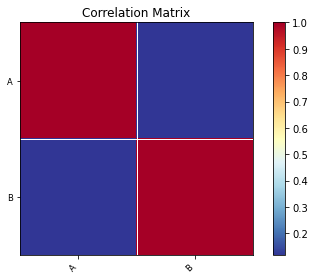

In [21]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.0026853844513682014
intercepción b0 is -0.11890322313736906


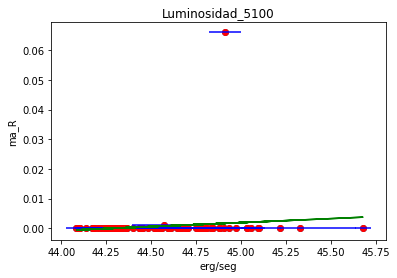

In [22]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_R')
plt.savefig("Luminosidad_5100_ma_R.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

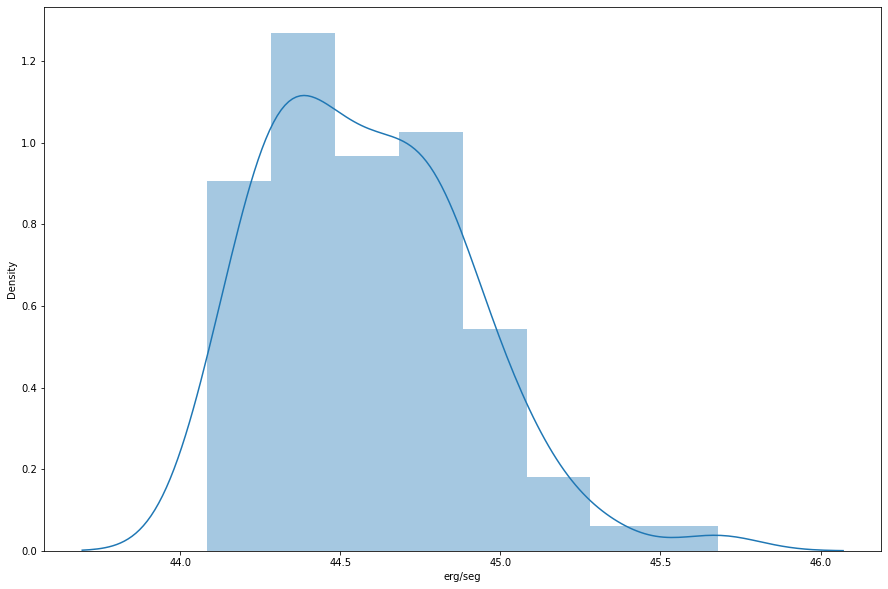

In [23]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [24]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.00268538]
 [1.        ]]
Intercepción: [-1.18903223e-01  7.10542736e-15]
Errorcuadratico medio : 2.5569751347528382e-05
Raiz del error cuadratico medio:  0.005056654165308162
 Coeficiente de determinacion R2 :  0.5068327488612892


In [25]:
data=pd.read_csv('MA_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.2983432323274103
               A         B        C
0   2.559298e-39  45.32733  0.31478
1   5.874771e-33  44.51848  0.07224
2   5.374588e-14  44.32612  0.01430
3   3.740092e-22  44.69770  0.00526
5   9.751131e-15  44.83574  0.05485
..           ...       ...      ...
76  9.365095e-46  44.36424  0.00708
77  1.881692e-38  44.17580  0.04911
78  6.295043e-41  44.40151  0.00523
79  3.752484e-32  44.20654  0.02390
80  1.362047e-06  44.59746  0.00671

[75 rows x 3 columns]


In [26]:
data.describe()

,A,B,C
count,7.500000e+01,75.000000,75.000000
mean,3.639071e+08,44.577739,0.055674
std,3.151528e+09,0.298343,0.059344
min,3.395079e-64,44.084260,0.001460
25%,1.513115e-40,44.328685,0.013105
50%,4.112287e-29,44.560430,0.032770
75%,3.321987e-17,44.791910,0.077220
max,2.729303e+10,45.327330,0.314780


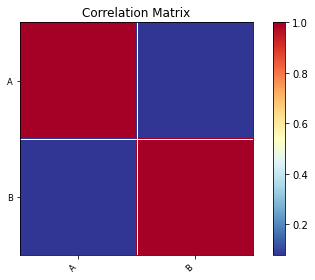

In [27]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  817680039.7248417
intercepción b0 is -36086420176.14872


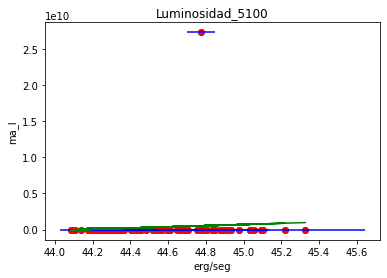

In [20]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_I')
plt.savefig("Luminosidad_5100_ma_I.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

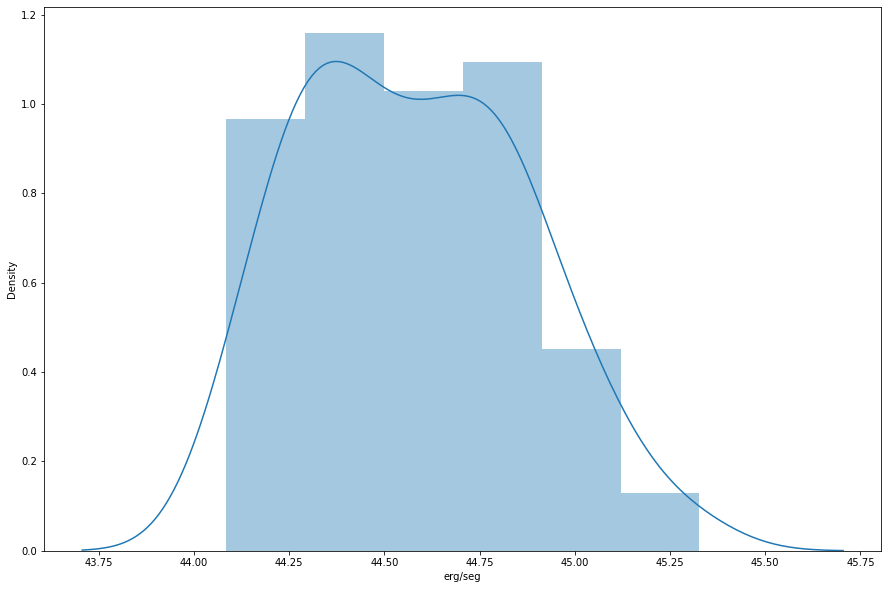

In [29]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')


In [30]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[8.1768004e+08]
 [1.0000000e+00]]
Intercepción: [-3.60864202e+10 -7.10542736e-15]
Errorcuadratico medio : 4.870489907132898e+18
Raiz del error cuadratico medio:  2206918645.3362746
 Coeficiente de determinacion R2 :  0.5029958975693338


In [31]:
data=pd.read_csv('MA_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.31649267477025095
               A         B        C
0   7.626508e-51  45.32733  0.31478
1   7.157408e-20  44.51848  0.07224
2   2.566714e+00  44.32612  0.01430
3   1.685526e-02  44.69770  0.00526
4   2.081561e-31  44.30242  0.01505
..           ...       ...      ...
72  2.886584e-21  45.05713  0.05654
73  5.417949e-49  44.56043  0.21451
74  4.384755e-46  44.78145  0.09942
75  1.789820e-13  44.77507  0.07369
76  1.490723e-02  44.36424  0.00708

[76 rows x 3 columns]


In [32]:
data.describe()

,A,B,C
count,7.600000e+01,76.000000,76.000000
mean,9.109470e-02,44.602818,0.055705
std,5.375964e-01,0.316493,0.058882
min,1.136218e-58,44.084260,0.001460
25%,8.801528e-37,44.331250,0.014185
50%,1.456143e-28,44.582300,0.034470
75%,1.870180e-18,44.801447,0.075455
max,3.946495e+00,45.679790,0.314780


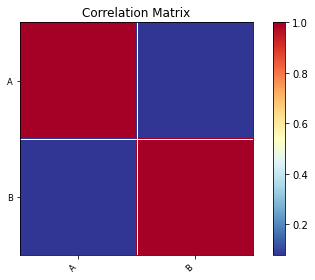

In [33]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.1323216137194062
intercepción b0 is -5.810822176039794


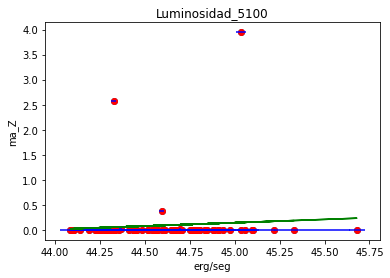

In [34]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_Z')
plt.savefig("Luminosidad_5100_ma_Z.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

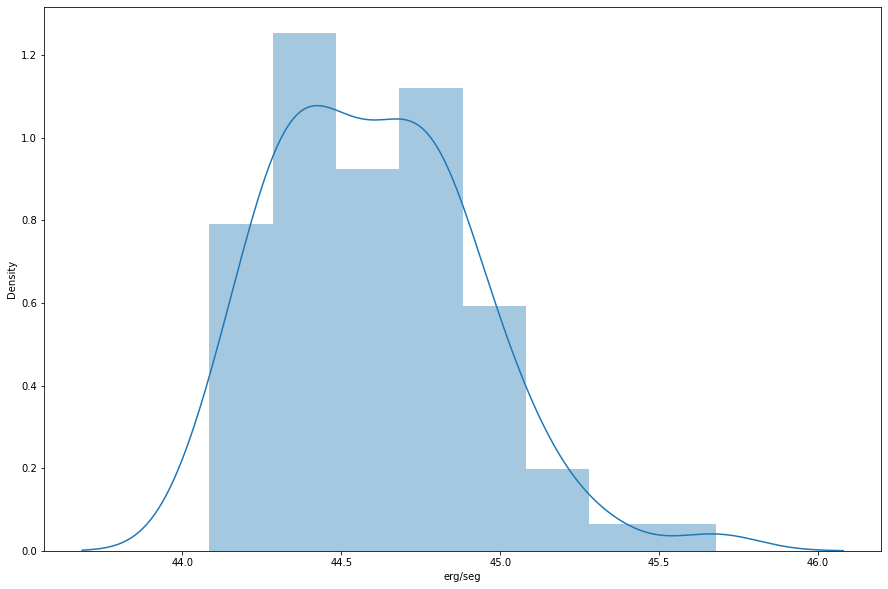

In [35]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')

In [36]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.13232161]
 [1.        ]]
Intercepción: [-5.81082218  0.        ]
Errorcuadratico medio : 0.14173816113134063
Raiz del error cuadratico medio:  0.37648128921812385
 Coeficiente de determinacion R2 :  0.5030342144629198
